In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.set_printoptions(formatter={'float': lambda x: f"{x:0.2f}"})

In [3]:
N = 2**3
x = np.linspace(-1, 1, N)
dx = np.diff(x)[0]
k_r = np.fft.rfftfreq(N, dx)
k = np.fft.fftfreq(N, dx)

In [4]:
y = 4*x**3 - 3*x**2 + 2*x + 4

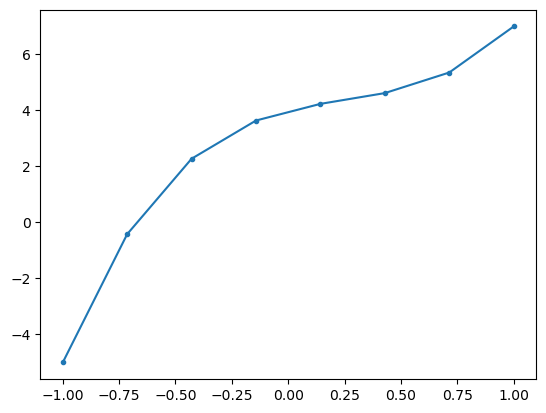

In [5]:
plt.plot(x, y, '.-')

In [6]:
Y_r = np.fft.rfft(y)
Y = np.fft.fft(y)

In [7]:
print(Y_r)

[ 21.71428571+0.j         -10.42359623+9.01594032j
  -8.39650146+6.43731778j  -8.04870698+2.85850592j
  -7.97667638+0.j        ]


In [8]:
print(Y)

[ 21.71428571+0.j         -10.42359623+9.01594032j
  -8.39650146+6.43731778j  -8.04870698+2.85850592j
  -7.97667638+0.j          -8.04870698-2.85850592j
  -8.39650146-6.43731778j -10.42359623-9.01594032j]


In [9]:
np.concatenate([Y[:N//2+1], np.conjugate(Y[N//2-1:0:-1])]) - Y

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [12]:
Y_r.real, Y_r.imag

(array([21.71, -10.42, -8.40, -8.05, -7.98]),
 array([0.00, 9.02, 6.44, 2.86, 0.00]))

In [16]:
Y_split = np.concatenate([Y_r.real, Y_r.imag[1:-1]])

In [17]:
Y_split.shape

(8,)

In [58]:
def construct_real_fourier(x):
    N = len(x)
    x_r = x[:N//2+1] + 1.j*np.concatenate([np.zeros(1), x[N//2+1:], np.zeros(1)])
    x_recon = np.concatenate([x_r[:N//2+1], np.conjugate(x_r[-2:0:-1])])
    return x_recon

In [28]:
Y_recon

array([ 21.71428571+0.j        , -10.42359623+9.01594032j,
        -8.39650146+6.43731778j,  -8.04870698+2.85850592j,
        -7.97667638+0.j        ])

In [25]:
Y_split

array([21.71, -10.42, -8.40, -8.05, -7.98, 9.02, 6.44, 2.86])

In [57]:
construct_real_fourier(Y_split) - Y

(5,)


array([0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.-8.8817842e-16j, 0.+0.0000000e+00j, 0.+8.8817842e-16j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j])

In [31]:
Y_r

array([ 21.71428571+0.j        , -10.42359623+9.01594032j,
        -8.39650146+6.43731778j,  -8.04870698+2.85850592j,
        -7.97667638+0.j        ])

In [36]:
Y[:N//2+1]

array([ 21.71428571+0.j        , -10.42359623+9.01594032j,
        -8.39650146+6.43731778j,  -8.04870698+2.85850592j,
        -7.97667638+0.j        ])

In [37]:
Y[N//2+1:]

array([ -8.04870698-2.85850592j,  -8.39650146-6.43731778j,
       -10.42359623-9.01594032j])

In [45]:
np.conjugate(Y[1:N//2])[::-1]

array([ -8.04870698-2.85850592j,  -8.39650146-6.43731778j,
       -10.42359623-9.01594032j])

In [51]:
np.conjugate(Y_r[-2:0:-1])

array([ -8.04870698-2.85850592j,  -8.39650146-6.43731778j,
       -10.42359623-9.01594032j])